In [1]:
! pip install numpy
! pip install matplotlib==3.7.2
! pip install scikit-learn==1.2.0
! pip install tensorflow
! pip install opencv-python

  Using cached numpy-1.24.4-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-macosx_11_0_arm64.whl (13.8 MB)
  Using cached matplotlib-3.7.2-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.0-cp38-cp38-macosx_10_9_universal2.whl.metadata (157 kB)
  Using cached kiwisolver-1.4.5-cp38-cp38-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached Pillow-10.1.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached zipp-3.17.0-py3-none-any.whl.metadata (3.7 kB)
Using cached matplotlib-3.7.2-cp38-cp38-macosx_11_0_arm64.whl (7.3 MB)
Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl 

In [4]:
# Step 1: Import necessary libraries
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
# Step 2: Loading and preprocessing the data
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".bmp"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (480, 360))  # Reducing input size to 64x64 pixels
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to your dataset folders
bikes_folder = 'dataset/bike'
cars_folder = 'dataset/cars'

bikes, bikes_labels = load_images(bikes_folder, 0)
cars, cars_labels = load_images(cars_folder, 1)

In [10]:
# Combining the both bike and car data
data = np.concatenate((bikes, cars))
labels = np.concatenate((bikes_labels, cars_labels))

# Converting labels to one-hot encoding
labels_one_hot = to_categorical(labels, num_classes=2)

In [11]:
# Spliting the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels_one_hot, test_size=0.2, random_state=42)

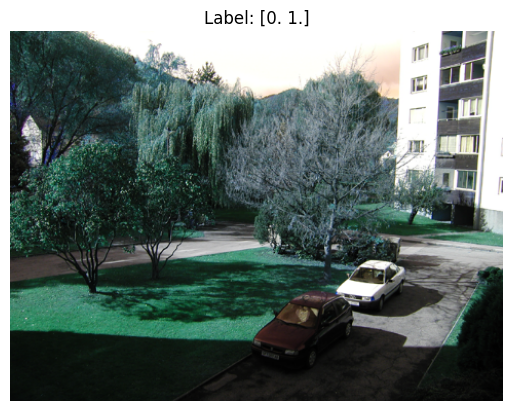

In [12]:
# Displaying a sample image
plt.imshow(Xtrain[0])
plt.title(f"Label: {ytrain[0]}")
plt.axis('off')
plt.show()